# Lab 8: Define and Solve an ML Problem of Your Choosing

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [4]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1) The data set I have chosen to proceed with is the census data.
2) I will predicting the the label, "income_binary" which will have either >50k or <=50k
3) This is a supervised learning problem. This is a binary classification problem since we are measuring whether the persons income is less than and equal to 50k or greater than 50k.
4) The features could include all the other columns: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, and native-country.
5) The importance of this problem can be applied to a lot of different scenarios, one of which being financial/credit unions determining the credit-worthiness of applicants as higher income often correlates to lower risk.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# Checking all columns with missing data
missing_values = df.isnull().sum()
print(missing_values)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [6]:
# Removing Missing Data
df['age'].fillna(df['age'].mean(), inplace=True)
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['hours-per-week'].fillna(df['hours-per-week'].mean(), inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

In [7]:
# Ensuring No Missing Data Left
missing_values_check = df.isnull().sum()
print(missing_values_check)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


In [8]:
# Replacing Any Outliers in Numerical Data with Floor/Cap Values
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [9]:
# We will rename one of the features which is sex_selfID to sex
df.rename(columns={'sex_selfID' : 'sex'}, inplace=True)
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary']

In [10]:
# We will use One-Hot Encoding on Categorical Features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

df = pd.get_dummies(df, columns=categorical_features)
df.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_binary',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Unknown',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Cr

In [11]:
# Next we will remove features that won't be necessary for the model
df.drop(columns=['fnlwgt'], axis=1, inplace=True)
df.columns.tolist()

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_binary',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Unknown',
 'workclass_Without-pay',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Divorced',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair'

In [12]:
df.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,39.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,13.0,0.0,0.0,32.5,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,9.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53.0,7.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37.0,14.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,49.0,5.0,0.0,0.0,32.5,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52.0,9.0,0.0,0.0,45.0,>50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,31.0,14.0,0.0,0.0,50.0,>50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9,42.0,13.0,0.0,0.0,40.0,>50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
# Distribution of income_binary
class_distribution = df['income_binary'].value_counts()
print(class_distribution)
# Percentage of Each Class
class_percentage = df['income_binary'].value_counts(normalize=True) * 100
print(class_percentage)

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64
<=50K    75.919044
>50K     24.080956
Name: income_binary, dtype: float64


In [14]:
# From The Above Output We See Class Imbalance
# We will fix this by Oversampling the minority class
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop(columns=['income_binary'], axis=1)
y = df['income_binary']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

print("Original Class Distribution:", Counter(y))
print("New Class Distribution:", Counter(y_resampled))

Original Class Distribution: Counter({'<=50K': 24720, '>50K': 7841})
New Class Distribution: Counter({'<=50K': 24720, '>50K': 24720})


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After tunning the data, I decided to drop the feature "fnlwgt" and used one-hot encoding on categorical features which resulted in a total of 107 features. As for the data preperation techniques that I plan on using include, handling missing numerical values with mean data, missing categorical data with "Unknown", and handling outliers by replacing them with floors and caps. I also noticed that there was class imbalance in the data so I decided to over sample the minority data so that it was 50/50 using SMOTE. The models I intend to use are linear regression, random forest classifier, and gradient boosting classifier. To do so, I will split the data into test and train data, then I will train the model, tune the hyperparameters, evaluate the models, and finally select the best model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [15]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [16]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,39.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,13.0,0.0,0.0,32.5,<=50K,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,9.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53.0,7.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28.0,13.0,0.0,0.0,40.0,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.8602346278317152


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Tunning Logistic Regression Model
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_log_reg_params = grid_search.best_params_
best_log_reg_model = grid_search.best_estimator_
best_y_pred_log_reg = best_log_reg_model.predict(X_test)
print("Best Logistic Regression")
print("Accuracy:", accuracy_score(y_test, best_y_pred_log_reg))

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best Logistic Regression
Accuracy: 0.8605380258899676


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier
Accuracy: 0.8748988673139159


In [18]:
# Tunning Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Classifier")
print("Best Accuracy:", accuracy_score(y_test, y_pred_best_rf))

KeyboardInterrupt: 

In [19]:
# Gradient Boosting Model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting
Accuracy: 0.8500202265372169


In [ ]:
# Tunning Gradient Boosting Model
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=2, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gbc.best_params_
best_model_gb = grid_search_gbc.best_estimator_

best_y_pred_gb = best_model_gbc.predict(X_test)
print("Best Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, best_y_pred_gb))

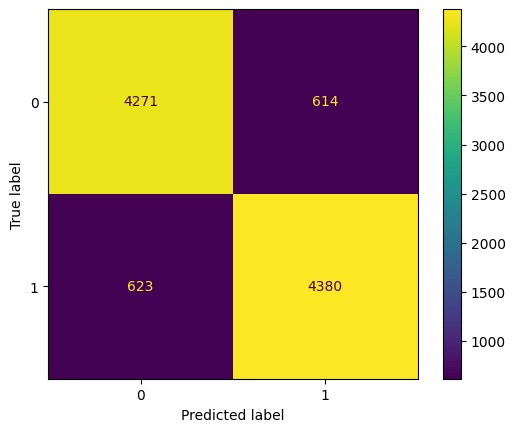

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

After trying all the models and tunning them, I found that the Random Forest model performed the best. You can see how it had the best performing accuracy score before and after tunning.